In [31]:
pip install networkx

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pylab as plt

data_points = [(0,1), (1,2), (1,4), (4,5), (4,6), (4,2), (2,7), (0,3), (3,7), (3,1), (3,2), (6,8), (5,8), (1,6)]

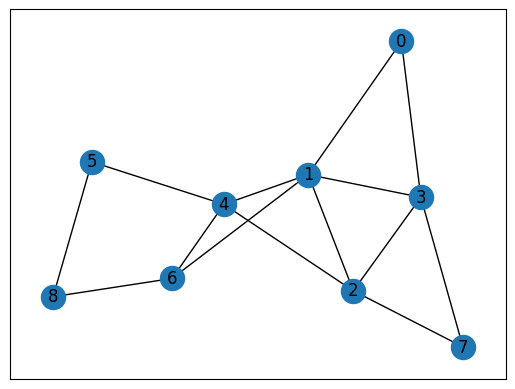

In [33]:
goal = 8
import networkx as nx
G = nx.Graph()
G.add_edges_from(data_points)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [34]:
MATRIX_SIZE = 9
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [35]:
for point in data_points:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

    R[goal,goal] = 100

(0, 1)
(1, 2)
(1, 4)
(4, 5)
(4, 6)
(4, 2)
(2, 7)
(0, 3)
(3, 7)
(3, 1)
(3, 2)
(6, 8)
(5, 8)
(1, 6)


In [36]:
R

matrix([[ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,   0.,   0.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,   0.,  -1.,  -1.,   0.,  -1.],
        [  0.,   0.,   0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,   0.,  -1.,  -1.,   0.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,   0.,  -1., 100.]])

In [37]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

gamma = 0.8

initial_state = 1

In [38]:
def possible_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

possible_act = possible_actions(initial_state)


In [39]:
possible_act

array([0, 2, 3, 4, 6])

In [40]:
def sample_action(possible_actions_range):
    next_action = int(np.random.choice(possible_act,1))
    return next_action

action = sample_action(possible_act)

In [41]:
action

6

In [42]:
def update(current_state, action, gamma):
    print("val ",current_state,action,gamma)
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print("max_index ",max_index)
    if max_index.shape[0] > 1:
         print("if ")
         max_index = int(np.random.choice(max_index, size = 1))
    else:
        print("else ")
        max_index = int(max_index)
        max_value = Q[action, max_index]
        
        Q[current_state, action] = R[current_state, action] + gamma * max_value
        print('max_value', R[current_state, action] + gamma * max_value)

        if (np.max(Q) > 0):
            return(np.sum(Q/np.max(Q)*100))
        else:
            return (0)
    print("max_index ",max_index)
    return max_index     

In [43]:

val = update(initial_state, action, gamma)
print("val ",val)

val  1 6 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  3
val  3


In [44]:
scores = []
for i in range(800):
    current_state = np.random.randint(0, int(Q.shape[0]))
    possible_act = possible_actions(current_state)

    print("possible_act:", possible_act)
    
    # Check if there are any possible actions
    if possible_act.size == 0:  # If no actions, skip this iteration
        print(f"No actions available for state {current_state}")
        continue

    # Sample an action from the possible actions
    action = sample_action(possible_act)
    score = update(current_state, action, gamma)  # Update Q-table and get score
    scores.append(score)

# Print results
print("Average Score after training:", np.mean(scores))
if np.max(Q) > 0:
    print("Q matrix after training (normalized):")
    print(Q / np.max(Q) * 100)
else:
    print("Q matrix has no values to normalize.")


possible_act: [2 3]
val  7 2 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  1
possible_act: [1 4 8]
val  6 4 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  3
possible_act: [1 3]
val  0 1 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  4
possible_act: [4 8]
val  5 4 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  4
possible_act: [4 8]
val  5 4 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  0
possible_act: [4 8]
val  5 8 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  0
possible_act: [5 6 8]
val  8 5 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  0
possible_act: [0 1 2 7]
val  3 0 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  3
possible_act: [1 3 4 7]
val  2 7 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  7
possible_act: [2 3]
val  7 3 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  6
possible_act: [2 3]
val  7 2 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  0
possible_act: [2 3]
val  7 3 0.8
max_index  [0 1 2 3 4 5 6 7 8]
if 
max_index  5
possible_act: [2

current_state: 0
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 6
current_state: 6
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 4
current_state: 4
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 0
current_state: 0
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 6
current_state: 6
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 6
current_state: 6
next_step_index before: [0 1 2 3 4 5 6 7 8]
next_step_index after: 8
Most efficient path:
[0, 6, 4, 0, 6, 6, 8]


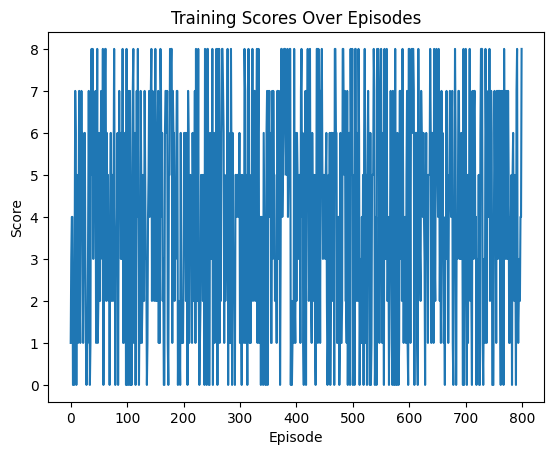

In [45]:

# Starting state and goal
current_state = 0
steps = [current_state]
print("current_state:", current_state)
    
# Finding the most efficient path
while current_state != 8:  # Assume state 8 is the goal
    print("current_state:", current_state)
    
    # Find the action(s) with the highest Q-value for the current state
    #next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[0]
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    print("next_step_index before:", next_step_index)
    
    # Handle ties (multiple actions with the same Q-value)
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    print("next_step_index after:", next_step_index)
    
    # Move to the next state
    steps.append(next_step_index)
    current_state = next_step_index

# Print the resulting path
print("Most efficient path:")
print(steps)

# Plot the training scores
plt.plot(scores)
plt.title("Training Scores Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()